In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

In [2]:
os.chdir('../')

In [3]:
from saliency_model.itti_koch import IttiKoch
plt.rcParams['image.cmap'] = 'gray'

In [4]:
def normalize_saliency_map(smap):
    if not (np.max(smap) == 0):  # don't normalize if saliency map is empty
        smap = smap / np.max(smap)
    return smap

In [9]:
# Load The Image
path = '../imgs/baby1.png'
# path = './imgs/group.jpg'
img = mpimg.imread(path)

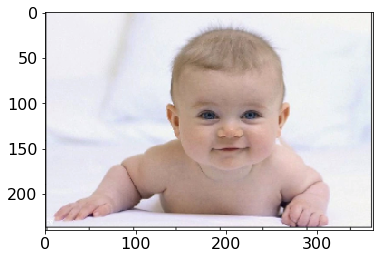

In [15]:
plt.imshow(img);

In [16]:
params_ik = {
    "mapwidth": 64,
    "face_model":'cnn',
}

features = ["intensity", "orientation", "color"]
IK = IttiKoch(input_params=params_ik, verbose=True)
smap, maps = IK.run(img, features, faces=False)

smap_face, maps = IK.run(img, [], faces=True)

Computing 3 image scales
Creating Gabor kernels for orientation.
Computing saliency maps for intensity.
Computing saliency maps for orientation.
Computing saliency maps for color.
Computing 3 image scales
Creating Gabor kernels for orientation.


/home/alteska/anaconda3/envs/saliency/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [17]:
smap_03 = normalize_saliency_map(smap * 0.7 + smap_face * 0.3)
smap_05 = normalize_saliency_map(smap * 0.5 + smap_face * 0.5)
smap_07 = normalize_saliency_map(smap * 0.3 + smap_face * 0.7)


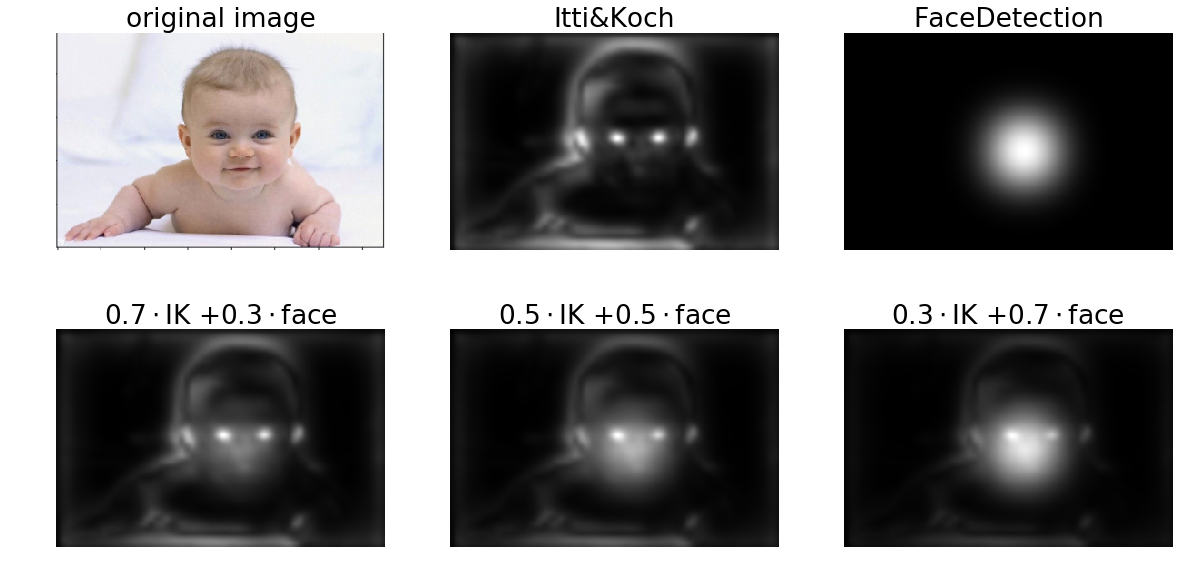

In [28]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0].imshow(img)
ax[0,1].imshow(smap)
ax[0,2].imshow(smap_face)

ax[1,0].imshow(smap_03)
ax[1,1].imshow(smap_05)
ax[1,2].imshow(smap_07)

ax[0,0].set_title('original image')
ax[0,1].set_title('Itti&Koch')
ax[0,2].set_title('FaceDetection')
ax[1,0].set_title('0.7 $\times$ IK + 0.3*face')
ax[1,1].set_title('0.5*IK + 0.5*face')
ax[1,0].set_title(r'$0.7 \cdot $IK +'+r'$0.3 \cdot $face')
ax[1,1].set_title(r'$0.5 \cdot $IK +'+r'$0.5 \cdot $face')
ax[1,2].set_title(r'$0.3 \cdot $IK +'+r'$0.7 \cdot $face')
# ax[1,2].set_title(r'$0.3 \times $IK +'+r'$0.7 \times $face')


ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')


plt.savefig('face_addition_baby.jpg', bbox_inches='tight', pad_inches=0)